# Contenido:

1.   Descripción Modelo **Gradient Boosting Regressor**.
2.   Cargue Bases de Datos.
3.   Analisis Descriptivo de variables.
4.   Analisis de Correlación variables.
5.   Creación de modelos.
6.   Graficos comparativos.



# 1. Descripción Modelo **Gradient Boosting Regressor**.

Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene combinando las predicciones de todos los árboles individuales que forman el modelo.

Muchos métodos predictivos generan modelos globales en los que una única ecuación se aplica a todo el espacio muestral. Cuando se dispone de múltiples predictores, que interaccionan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las variables. Los métodos estadísticos y de machine learning basados en árboles engloban a un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones. Esta característica les proporciona gran parte de su potencial.

Los métodos basados en árboles se han convertido en un referente dentro del ámbito del machine learning por los buenos resultados que generan en problemas muy diversos. A lo largo de este documento se explora la forma en que se cómo se construyen y utilizan los modelos Gradient Boosting Trees.

**Ventajas**

* Son capaces de seleccionar predictores más relevantes de forma automática.

* Pueden aplicarse a problemas de regresión y clasificación.

* Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.

* Al ser métodos no paramétricos, no requieren que los datos sigan una distribución específica.

* Por lo general, necesitan menos limpieza y preprocesamiento de datos en comparación con otros métodos de aprendizaje estadístico. Por ejemplo, no requieren estandarización.

* Son menos susceptibles a ser influenciados por valores atípicos (outliers).

* Si el valor de un predictor no está disponible para una observación, aún se puede realizar una predicción utilizando las observaciones del último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.

* Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.

* Son adecuados para conjuntos de datos con un gran número de observaciones, demostrando una buena escalabilidad.

**Desventajas**

* La combinación de múltiples árboles reduce la capacidad de interpretación en comparación con modelos basados en un solo árbol.

* Al tratar con predictores continuos, se puede perder parte de la información al categorizarlos durante la división de los nodos.

* Tal y como se describe más adelante, la creación de las ramificaciones de los árboles se consigue mediante el algoritmo de recursive binary splitting. Este algoritmo identifica y evalúa las posibles divisiones de cada predictor acorde a una determinada medida (RSS, Gini, entropía…). Los predictores continuos o predictores cualitativos con muchos niveles tienen mayor probabilidad de contener, solo por azar, algún punto de corte óptimo, por lo que suelen verse favorecidos en la creación de los árboles.

* No son capaces de extrapolar fuera del rango observado en los datos de entrenamiento.

# 2. Cargue Bases de Datos

## 2.1. Cargue base de datos con todos los jugadores

In [ ]:
# cargar el archivo excel
from google.colab import files

uploaded = files.upload()

import pandas as pd
df_total = pd.read_excel(list(uploaded.keys())[0])

# Mostrar las primeras filas del DataFrame
df_total.head()

Saving Estadisticas_jugadores_V6.xlsx to Estadisticas_jugadores_V6.xlsx


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Da_Ganados%,Precio 2022-2023,Precio 2023-2024
0,James Abankwah,ie IRL,DF,Udinese,Serie A,18,2004,2,1,63.000,...,1,0,0,0,2,2,0,100.0,300000,300000
1,Oliver Abildgaard,dk DEN,MC,Hellas Verona,Serie A,26,1996,13,6,592.000,...,6,0,0,0,37,50,21,70.4,4500000,2500000
2,Tammy Abraham,eng ENG,DC,Roma,Serie A,24,1997,38,24,2.189,...,10,1,0,0,46,80,74,51.9,40000000,30000000
3,Christian Acella,it ITA,MC,Cremonese,Serie A,20,2002,1,0,15.000,...,0,0,0,0,1,0,0,0.0,150000,100000
4,Francesco Acerbi,it ITA,DF,Inter,Serie A,34,1988,31,25,2.425,...,19,0,0,0,151,78,42,65.0,4000000,3500000


In [ ]:
# Obtener el tamaño del DataFrame
tamaño_filas_columnas = df_total.shape
tamaño_total = df_total.size

print("Tamaño del DataFrame (filas, columnas):", tamaño_filas_columnas)
print("Número total de elementos en el DataFrame:", tamaño_total)

Tamaño del DataFrame (filas, columnas): (2365, 152)
Número total de elementos en el DataFrame: 359480


## 2.2. Cargue base de datos con los jugadores de prueba

In [ ]:
# cargar el archivo excel
from google.colab import files

uploaded = files.upload()

import pandas as pd
df_jugadores_prueba = pd.read_excel(list(uploaded.keys())[0])

# Mostrar las primeras filas del DataFrame
df_jugadores_prueba.head()

Saving prueba final.xlsx to prueba final.xlsx


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Da_Ganados%,Precio 2022-2023,Precio 2022
0,Felix Afena-Gyan,gh GHA,DC,Roma,Serie A,18,2003,17,6,668.000,...,3,0,0,0,31,11,15,42.3,6000000,4200000
1,Ethan Ampadu,wls WAL,MC,Venezia,Serie A,20,2000,29,26,2.282,...,43,0,0,0,157,66,33,66.7,13000000,12000000
2,Janis Antiste,fr FRA,DC,Spezia,Serie A,18,2002,18,9,796.000,...,11,0,0,0,36,16,19,45.7,4000000,2300000
3,Kristoffer Askildsen,no NOR,MC,Sampdoria,Serie A,20,2001,19,7,754.000,...,6,0,0,1,43,21,10,67.7,1800000,1400000
4,Kristjan Asllani,al ALB,MC,Empoli,Serie A,19,2002,23,14,1.353,...,9,0,0,0,122,4,6,40.0,10000000,12000000


In [ ]:
# Obtener el tamaño del DataFrame
tamaño_filas_columnas = df_jugadores_prueba.shape
tamaño_total = df_jugadores_prueba.size

print("Tamaño del DataFrame (filas, columnas):", tamaño_filas_columnas)
print("Número total de elementos en el DataFrame:", tamaño_total)

Tamaño del DataFrame (filas, columnas): (50, 154)
Número total de elementos en el DataFrame: 7700


## 2.3. Cargue base de datos con los jugadores DF_SUB_20

In [ ]:
# cargar el archivo excel
from google.colab import files

uploaded = files.upload()

import pandas as pd
df_sub_20_df = pd.read_excel(list(uploaded.keys())[0])

# Mostrar las primeras filas del DataFrame
df_sub_20_df.head()

Saving Estadisticas_jugadores_DF_V1.xlsx to Estadisticas_jugadores_DF_V1.xlsx


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,Int,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Precio 2022-2023,Precio 2023-2024
0,James Abankwah,ie IRL,DF,Udinese,Serie A,18,2004,2,1,63.0,...,0,1,0,0,0,2,2,0,300000,300000
1,Bruno Amione,ar ARG,DF,Hellas Verona,Serie A,20,2002,1,1,58.0,...,0,1,0,0,0,5,1,0,2700000,3000000
2,Tommaso Barbieri,it ITA,DF,Juventus,Serie A,19,2002,3,2,109.0,...,0,3,0,0,0,2,0,2,600000,2000000
3,Leonardo Buta,pt POR,DF,Udinese,Serie A,20,2002,2,0,16.0,...,0,1,0,0,0,0,0,0,2000000,3000000
4,Franco Carboni,it ITA,DF,Monza,Serie A,19,2003,3,0,66.0,...,1,1,0,0,0,7,1,1,1000000,900000


In [ ]:
# Obtener el tamaño del DataFrame
tamaño_filas_columnas = df_sub_20_df .shape
tamaño_total = df_sub_20_df .size

print("Tamaño del DataFrame (filas, columnas):", tamaño_filas_columnas)
print("Número total de elementos en el DataFrame:", tamaño_total)

Tamaño del DataFrame (filas, columnas): (115, 57)
Número total de elementos en el DataFrame: 6555


## 2.4. Cargue base de datos con los jugadores MC_SUB_20

In [ ]:
# cargar el archivo excel
from google.colab import files

uploaded = files.upload()

import pandas as pd
df_sub_20_mc = pd.read_excel(list(uploaded.keys())[0])

# Mostrar las primeras filas del DataFrame
df_sub_20_mc.head()

Saving Estadisticas_jugadores_MC_V1.xlsx to Estadisticas_jugadores_MC_V1.xlsx


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,AGC,AGC90,AGC_Balon_vivo,AGC_Balon_muerto,AGC_HASTA,AGC_Dis,AGC_FR,AGC_Def,Precio 2022-2023,Precio 2023-2024
0,Christian Acella,it ITA,MC,Cremonese,Serie A,20,2002,1,0,15.000,...,0,0.00,0,0,0,0,0,0,150000,100000
1,Kristjan Asllani,al ALB,MC,Inter,Serie A,20,2002,20,5,592.000,...,1,0.15,1,0,0,0,0,0,12000000,18000000
2,Tommaso Baldanzi,it ITA,MC,Empoli,Serie A,19,2003,26,24,1.772,...,4,0.20,4,0,0,0,0,0,15000000,15000000
3,Alberto Basso,it ITA,MC,Cremonese,Serie A,18,2004,1,0,16.000,...,0,0.00,0,0,0,0,0,0,100000,100000
4,Julius Beck,dk DEN,MC,Spezia,Serie A,17,2005,1,0,10.000,...,0,0.00,0,0,0,0,0,0,250000,350000


In [ ]:
# Obtener el tamaño del DataFrame
tamaño_filas_columnas = df_sub_20_mc.shape
tamaño_total = df_sub_20_mc.size

print("Tamaño del DataFrame (filas, columnas):", tamaño_filas_columnas)
print("Número total de elementos en el DataFrame:", tamaño_total)

Tamaño del DataFrame (filas, columnas): (166, 71)
Número total de elementos en el DataFrame: 11786


## 2.5. Cargue base de datos con los jugadores DC_SUB_20

In [ ]:
# cargar el archivo excel
from google.colab import files

uploaded = files.upload()

import pandas as pd
df_sub_20_dc = pd.read_excel(list(uploaded.keys())[0])

# Mostrar las primeras filas del DataFrame
df_sub_20_dc.head()

Saving Estadisticas_jugadores_DC_V1.xlsx to Estadisticas_jugadores_DC_V1.xlsx


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,Int,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Precio 2022-2023,Precio 2023-2024
0,Felix Afena-Gyan,gh GHA,DC,Cremonese,Serie A,19,2003,23,7,817.0,...,1,3,0,0,0,39,17,42,4200000,2500000
1,Janis Antiste,fr FRA,DC,Sassuolo,Serie A,19,2002,2,0,52.0,...,0,0,0,0,0,4,2,1,2300000,1900000
2,Matteo Cancellieri,it ITA,DC,Lazio,Serie A,20,2002,20,1,256.0,...,1,4,1,0,0,14,4,3,5000000,4800000
3,Emil Ceide,no NOR,DC,Sassuolo,Serie A,20,2001,19,5,515.0,...,1,2,1,0,0,18,1,3,2000000,2000000
4,Tio Cipot,si SVN,DC,Spezia,Serie A,19,2003,8,0,139.0,...,0,7,0,0,0,8,1,2,700000,600000


In [ ]:
# Obtener el tamaño del DataFrame
tamaño_filas_columnas = df_sub_20_dc.shape
tamaño_total = df_sub_20_dc.size

print("Tamaño del DataFrame (filas, columnas):", tamaño_filas_columnas)
print("Número total de elementos en el DataFrame:", tamaño_total)

Tamaño del DataFrame (filas, columnas): (134, 68)
Número total de elementos en el DataFrame: 9112


## 2.6 Data frame Defensas todas las edades y variables





In [ ]:
# Extraer DataFrames según el valor de la columna 'Posc'
df_DF = df_total[df_total['Posc'] == 'DF']


# Opcional: Mostrar el tamaño de cada DataFrame extraído
print("Tamaño de df_DF:", df_DF.shape)

df_DF.head()

Tamaño de df_DF: (931, 152)


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Da_Ganados%,Precio 2022-2023,Precio 2023-2024
0,James Abankwah,ie IRL,DF,Udinese,Serie A,18,2004,2,1,63.000,...,1,0,0,0,2,2,0,100.0,300000,300000
4,Francesco Acerbi,it ITA,DF,Inter,Serie A,34,1988,31,25,2.425,...,19,0,0,0,151,78,42,65.0,4000000,3500000
9,Ola Aina,ng NGA,DF,Torino,Serie A,25,1996,19,9,876.000,...,13,0,1,0,62,12,10,54.5,5000000,12000000
10,Emanuel Aiwum,at AUT,DF,Cremonese,Serie A,21,2000,23,17,1.653,...,34,0,0,0,121,28,17,62.2,3500000,3000000
14,Kelvin Amian,fr FRA,DF,Spezia,Serie A,24,1998,30,26,2.372,...,32,0,2,0,107,34,35,49.3,3800000,2500000


## 2.7 Data frame Mediocampistas todas las edades y variables

In [ ]:
# Extraer DataFrames según el valor de la columna 'Posc'
df_MC = df_total[df_total['Posc'] == 'MC']


# Opcional: Mostrar el tamaño de cada DataFrame extraído
print("Tamaño de df_MC:", df_MC.shape)

df_MC.head()

Tamaño de df_MC: (820, 152)


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Da_Ganados%,Precio 2022-2023,Precio 2023-2024
1,Oliver Abildgaard,dk DEN,MC,Hellas Verona,Serie A,26,1996,13,6,592.000,...,6,0,0,0,37,50,21,70.4,4500000,2500000
3,Christian Acella,it ITA,MC,Cremonese,Serie A,20,2002,1,0,15.000,...,0,0,0,0,1,0,0,0.0,150000,100000
5,Yacine Adli,fr FRA,MC,Milan,Serie A,22,2000,6,1,144.000,...,3,0,0,0,8,1,3,25.0,8000000,15000000
8,Kevin Agudelo,co COL,MC,Spezia,Serie A,23,1998,34,23,2.131,...,38,0,0,0,140,17,27,38.6,4000000,4500000
11,Jean-Daniel Akpa-Akpro,ci CIV,MC,Empoli,Serie A,29,1992,24,16,1.356,...,37,0,0,0,76,16,18,47.1,1400000,1000000


## 2.8 Data frame Delanteros todas las edades y variables

In [ ]:
# Extraer DataFrames según el valor de la columna 'Posc'
df_DC = df_total[df_total['Posc'] == 'DC']


# Opcional: Mostrar el tamaño de cada DataFrame extraído
print("Tamaño de df_DC:", df_DC.shape)

df_DC.head()

Tamaño de df_DC: (614, 152)


,Jugador,País,Posc,Equipo,Comp,Edad,Nacimiento,PJ,Titular,Min,...,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Da_Ganados%,Precio 2022-2023,Precio 2023-2024
2,Tammy Abraham,eng ENG,DC,Roma,Serie A,24,1997,38,24,2.189,...,10,1,0,0,46,80,74,51.9,40000000,30000000
6,Michel Aebischer,ch SUI,DC,Bologna,Serie A,25,1997,32,18,1.542,...,6,1,1,0,68,10,25,28.6,4000000,9000000
7,Felix Afena-Gyan,gh GHA,DC,Cremonese,Serie A,19,2003,23,7,817.000,...,3,0,0,0,39,17,42,28.8,4200000,2500000
13,Agustín Álvarez Martínez,uy URU,DC,Sassuolo,Serie A,21,2001,22,1,368.000,...,3,0,0,0,20,8,12,40.0,8000000,4500000
18,Felipe Anderson,br BRA,DC,Lazio,Serie A,29,1993,38,35,2.958,...,50,1,0,0,142,14,21,40.0,15000000,8000000


# 3. Analisis Descriptivo de variables.

In [ ]:
import pandas as pd

# Realizar un análisis descriptivo general de las variables numéricas
desc_numericas = df_total.describe()

# Para las variables categóricas, calcular la distribución de frecuencias
desc_categoricas = df_total.select_dtypes(include=['object', 'category']).describe()

# Mostrar los resultados del análisis descriptivo
print("Estadísticas Descriptivas Numéricas:")
print(desc_numericas)

print("\nDistribución de Frecuencias de Variables Categóricas:")
print(desc_categoricas)


Estadísticas Descriptivas Numéricas:
              Edad   Nacimiento           PJ      Titular          Min  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000   
mean     25.052917  1996.591250    20.355417    14.210000   161.514839   
std       4.561391     4.562018    11.556805    11.376723   276.639751   
min      15.000000  1981.000000     1.000000     0.000000     1.000000   
25%      22.000000  1993.000000    10.000000     3.000000     1.838000   
50%      25.000000  1997.000000    22.000000    13.000000     2.823000   
75%      28.000000  2000.000000    31.000000    24.000000   206.000000   
max      41.000000  2007.000000    38.000000    38.000000   998.000000   

              90 s          Gls          Ast          G+A         G-TP  ...  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000  ...   
mean     14.177708     1.886250     1.319583     3.205833     1.712500  ...   
std      10.728763     3.314673     2.002071     4.703033  

# 4. Analisis de Correlación variables.

## 4.1. Top 30 variables correlación df_total

Top 30 Variables con mayor correlación con el Precio 2022-2023:
Precio 2023-2024    1.000000
Precio 2022-2023    0.905289
LE_onG              0.511437
AGC                 0.493799
G+A                 0.492634
T_Ataq_pen          0.488796
AGC_Balon_vivo      0.471674
G-TP                0.464706
Dis                 0.464050
Tra_TAP             0.462130
Dap                 0.461853
TO_Succ             0.455403
ACT_Balon_vivo      0.454662
TO_Att              0.453763
PrgC                0.453142
Tra_PrgC            0.451343
T_3_ataq            0.450217
ACT                 0.449933
LE_+/-              0.449594
Gls                 0.448295
ACT_HASTA           0.432397
Tra_1/3             0.423857
PrgR                0.419025
Rec_PrgR            0.418079
Rec_Rec             0.417005
TO_Tkld             0.416230
Ast                 0.415033
Cint                0.402329
Tra_Dist_Tot        0.401592
ACT_Dis             0.401245
Name: Precio 2023-2024, dtype: float64


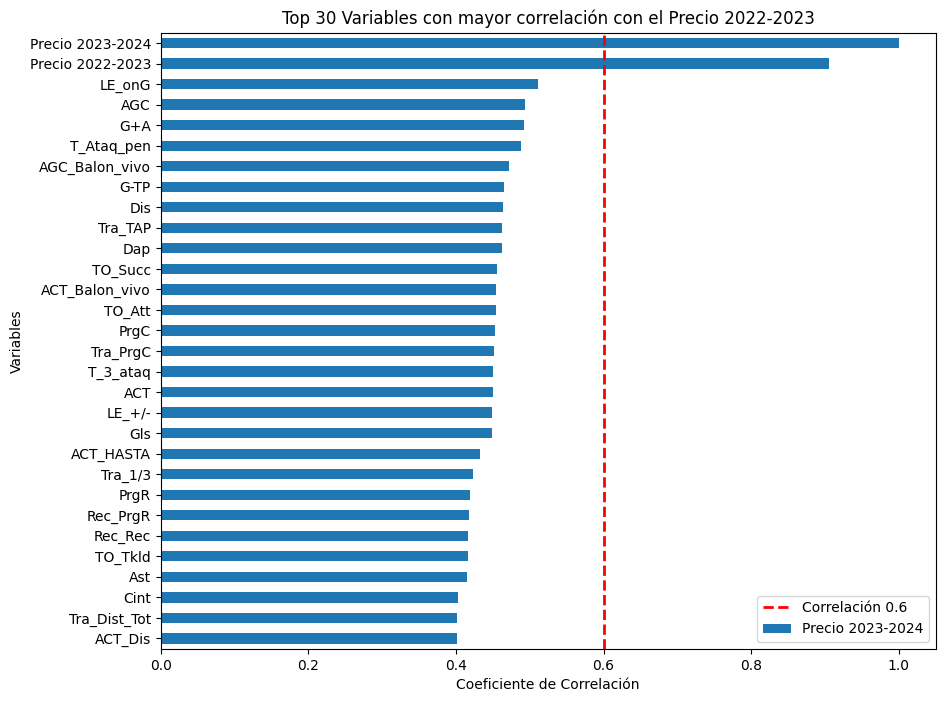

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de trabajar solo con variables numéricas
numericas = df_total.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de cada variable con respecto al Precio 2022-2023
correlaciones = numericas.corr()

# Ordenar las correlaciones de la variable 'Precio 2022-2023' en orden descendente
correlacion_precio = correlaciones['Precio 2023-2024'].sort_values(ascending=False)

# Seleccionar las 30 variables con mayor correlación
top_30_corr = correlacion_precio.head(30)

# Mostrar las 30 variables con mayor correlación
print("Top 30 Variables con mayor correlación con el Precio 2022-2023:")
print(top_30_corr)

# Graficar las 30 principales correlaciones con una línea roja en 0.6
plt.figure(figsize=(10, 8))
top_30_corr.plot(kind='barh')
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=2, label='Correlación 0.6')
plt.title('Top 30 Variables con mayor correlación con el Precio 2022-2023')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.legend()
plt.show()


## 4.2. Top 30 variables correlación DF SUB 20

Top 30 Variables con mayor correlación con el Precio 2022-2023:
Precio 2023-2024    1.000000
Precio 2022-2023    0.864225
PrgP                0.704645
Recup               0.644760
90 s                0.601853
Titular             0.599518
B_Tkl+Int           0.590652
B_Int               0.589702
Int                 0.589702
Fls                 0.587301
PJ                  0.576895
TklG                0.545598
Der_TklG            0.545598
Der_Tkl             0.529561
PrgC                0.526195
Der_3_cent          0.522010
Der_3_def           0.519633
DA_Ganados          0.513424
G+A                 0.510749
Des_Tkl             0.509869
B_Bloqueos          0.503646
B_Pases             0.491568
PA                  0.483291
Des_Att             0.475228
Ast                 0.472103
PrgR                0.466071
FR                  0.462681
Da_Perdidos         0.448293
TA                  0.437126
B_Desp              0.428232
Name: Precio 2023-2024, dtype: float64


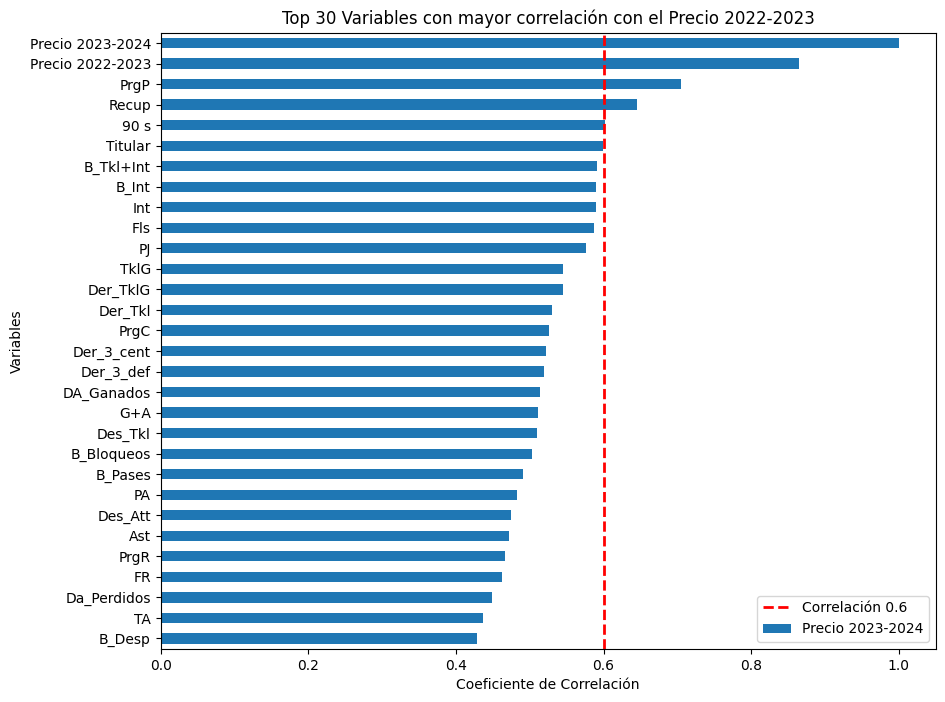

In [ ]:

numericas = df_sub_20_df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de cada variable con respecto al Precio 2022-2023
correlaciones = numericas.corr()

# Ordenar las correlaciones de la variable 'Precio 2022-2023' en orden descendente
correlacion_precio = correlaciones['Precio 2023-2024'].sort_values(ascending=False)

# Seleccionar las 30 variables con mayor correlación
top_30_corr = correlacion_precio.head(30)

# Mostrar las 30 variables con mayor correlación
print("Top 30 Variables con mayor correlación con el Precio 2022-2023:")
print(top_30_corr)

# Graficar las 30 principales correlaciones con una línea roja en 0.6
plt.figure(figsize=(10, 8))
top_30_corr.plot(kind='barh')
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=2, label='Correlación 0.6')
plt.title('Top 30 Variables con mayor correlación con el Precio 2022-2023')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

## 4.3. Top 30 variables correlación MC SUB 20

Top 30 Variables con mayor correlación con el Precio 2022-2023:
Precio 2023-2024    1.000000
Precio 2022-2023    0.900809
ACT_Balon_vivo      0.735849
PrgP                0.725341
PrgP.1              0.725341
ACT                 0.712421
"1/3"               0.697269
CCmp                0.696288
Cint                0.692639
PPA                 0.691070
TCmp                0.675365
Tint                0.669844
PrgC                0.669343
Dis                 0.669168
TDist_tot           0.655262
AGC                 0.655132
Gls                 0.651275
ACT_Dis             0.644684
Dap                 0.641900
G-TP                0.640212
TDist_prg           0.638765
G+A                 0.630556
MCmp                0.630322
Mint                0.630157
PC                  0.625242
AGC_Balon_vivo      0.619936
PrgR                0.614918
90 s                0.611881
ACT_FR              0.610073
ACT_HASTA           0.603080
Name: Precio 2023-2024, dtype: float64


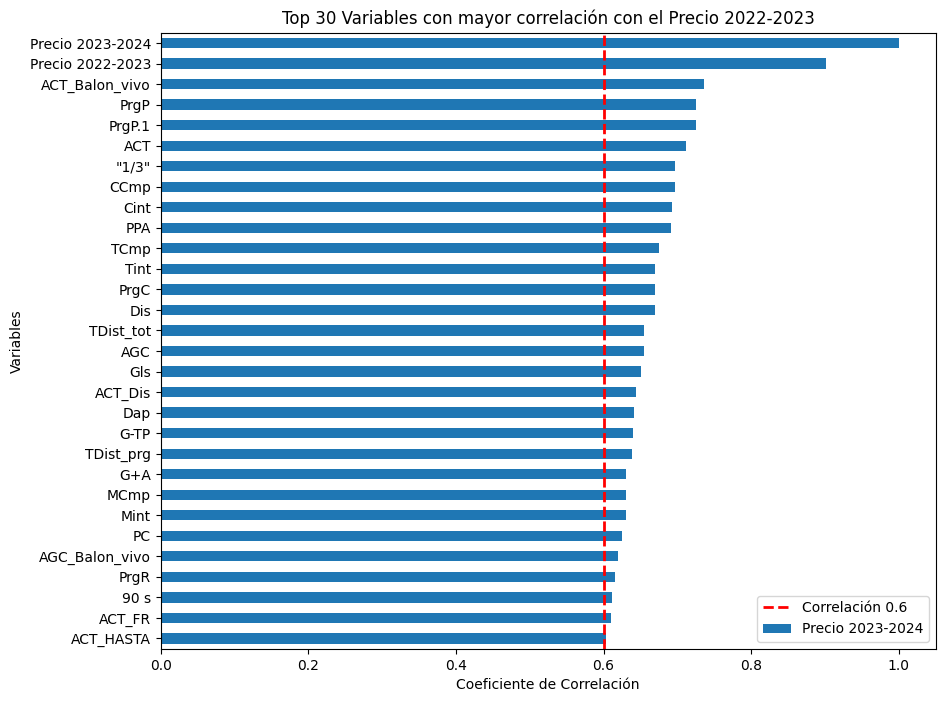

In [ ]:

numericas_MC = df_sub_20_mc.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de cada variable con respecto al Precio 2022-2023
correlaciones = numericas_MC.corr()

# Ordenar las correlaciones de la variable 'Precio 2022-2023' en orden descendente
correlacion_precio = correlaciones['Precio 2023-2024'].sort_values(ascending=False)

# Seleccionar las 30 variables con mayor correlación
top_30_corr = correlacion_precio.head(30)

# Mostrar las 30 variables con mayor correlación
print("Top 30 Variables con mayor correlación con el Precio 2022-2023:")
print(top_30_corr)

# Graficar las 30 principales correlaciones con una línea roja en 0.6
plt.figure(figsize=(10, 8))
top_30_corr.plot(kind='barh')
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=2, label='Correlación 0.6')
plt.title('Top 30 Variables con mayor correlación con el Precio 2022-2023')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

## 4.4. Top 30 variables correlación DC SUB 20

Top 30 Variables con mayor correlación con el Precio 2022-2023:
Precio 2023-2024    1.000000
Precio 2022-2023    0.898320
G+A                 0.688966
Ast                 0.672213
ACT_Balon_vivo      0.665336
AGC                 0.660882
PrgR                0.659993
ACT                 0.659624
AGC_Balon_vivo      0.649999
PrgP                0.625182
PrgC                0.623972
Gls                 0.589668
G-TP                0.576498
90 s                0.572533
Recup               0.565710
Dap                 0.559408
FR                  0.550799
Titular             0.548933
Dis                 0.547506
AGC_Def             0.544153
ACT_Balon_muerto    0.541253
Pcz                 0.518917
ACT_Dis             0.505414
AGC_Balon_muerto    0.502794
TklG                0.489656
PJ                  0.463227
Fls                 0.459983
ACT_FR              0.449243
TA                  0.437572
Int                 0.431004
Name: Precio 2023-2024, dtype: float64


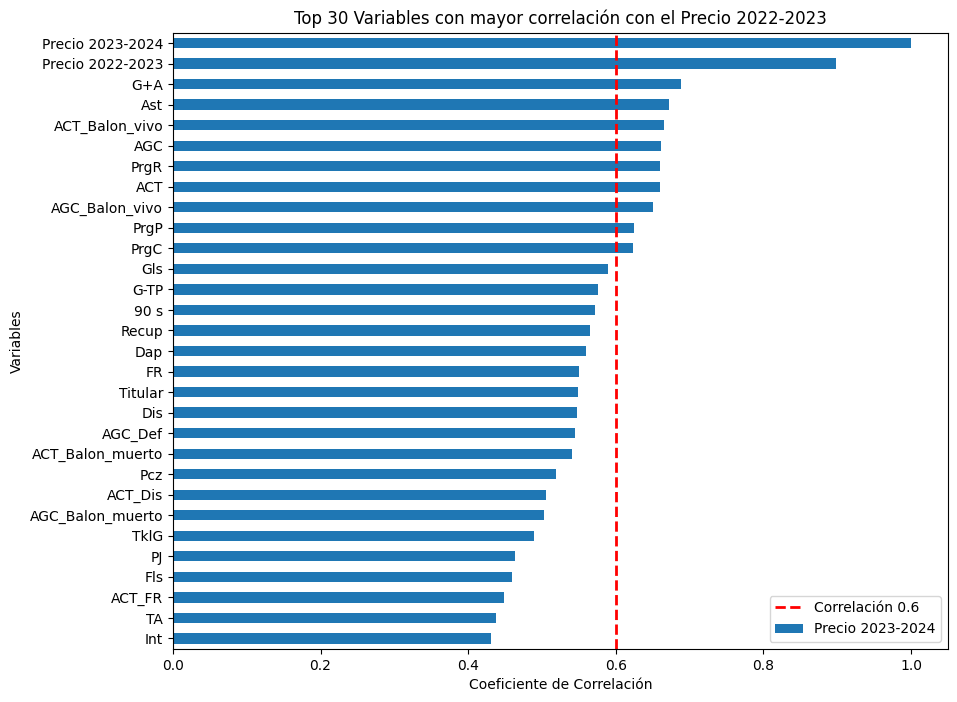

In [ ]:

numericas_DC = df_sub_20_dc.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de cada variable con respecto al Precio 2022-2023
correlaciones = numericas_DC.corr()

# Ordenar las correlaciones de la variable 'Precio 2022-2023' en orden descendente
correlacion_precio = correlaciones['Precio 2023-2024'].sort_values(ascending=False)

# Seleccionar las 30 variables con mayor correlación
top_30_corr = correlacion_precio.head(30)

# Mostrar las 30 variables con mayor correlación
print("Top 30 Variables con mayor correlación con el Precio 2022-2023:")
print(top_30_corr)

# Graficar las 30 principales correlaciones con una línea roja en 0.6
plt.figure(figsize=(10, 8))
top_30_corr.plot(kind='barh')
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=2, label='Correlación 0.6')
plt.title('Top 30 Variables con mayor correlación con el Precio 2022-2023')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

# 5. Creación de modelos.

## 5.1. Modelo con base SUB_20 DF (Personalizada)




### Modelo 5.1.1

Sub 20 Defensas todas las variables cuantitativas


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_df_clean = df_sub_20_df.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_df_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_df_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con el nombre "modelo_1_sub_20_DF"
modelo_1_sub_20_DF = GradientBoostingRegressor(random_state=42)
modelo_1_sub_20_DF.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_1_sub_20_DF.predict(X_test)

# Calcular las métricas de desempeño
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R²: 0.5782081615062429
MSE: 102214095949792.88
RMSE: 10110098.711179474


In [ ]:
# Importancia de las características
importancias = modelo_1_sub_20_DF.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_df.head(20))

Características más importantes:
      Característica  Importancia
50  Precio 2022-2023     0.812437
26        Der_3_ataq     0.016831
17            Gls/90     0.014678
34         B_Tkl+Int     0.014228
49       Da_Perdidos     0.012746
15              PrgP     0.011775
6                Gls     0.011443
16              PrgR     0.011113
12                TA     0.010038
35            B_Desp     0.009224
9               G-TP     0.008759
41               Pcz     0.007320
4                Min     0.006216
48        DA_Ganados     0.005161
29       Des_Perdida     0.004931
0               Edad     0.004296
46                GC     0.003935
25        Der_3_cent     0.003380
1         Nacimiento     0.003312
22           Der_Tkl     0.002973


### Modelo 5.1.2 - importancia variables

Sub 20 Defensas todas las variables cuantitativas

In [ ]:

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_df_clean = df_sub_20_df.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_df_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_df_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.002
caracteristicas_importantes = importancia_df[importancia_df['Importancia'] > importancia_threshold]['Característica']
X_filtered = X[caracteristicas_importantes]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor como "modelo_2_sub_20_DF"
modelo_2_sub_20_DF = GradientBoostingRegressor(random_state=42)
modelo_2_sub_20_DF.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_2 = modelo_2_sub_20_DF.predict(X_test)

# Calcular las métricas de desempeño del nuevo modelo
r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

# Mostrar los resultados del nuevo modelo
print(f"R² del modelo_2: {r2_2}")
print(f"MSE del modelo_2: {mse_2}")
print(f"RMSE del modelo_2: {rmse_2}")


R² del modelo_2: 0.5744067088362079
MSE del modelo_2: 103135313509030.44
RMSE del modelo_2: 10155555.795180805


### Modelo 5.1.3 - importancia variables + hiperparametros

Sub 20 Defensas todas las variables cuantitativas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_df_clean = df_sub_20_df.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_df_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_df_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (menores que un umbral)
importancia_threshold_df = 0.002
caracteristicas_importantes_df = importancia_df[importancia_df['Importancia'] > importancia_threshold_df]['Característica']
X_filtered = X[caracteristicas_importantes_df]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente para el modelo Gradient Boosting Regressor
modelo_3_sub_20_DF = GradientBoostingRegressor(
    n_estimators=100,        # Número de árboles en el ensemble
    learning_rate=0.2,       # Tasa de aprendizaje
    max_depth=1,             # Profundidad máxima de cada árbol
    subsample=1,           # Submuestreo de los datos de entrenamiento para cada árbol
    min_samples_split=2,     # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=1,      # Mínimo de muestras requeridas en cada hoja
    random_state=42         # Para reproducibilidad
)

# Entrenar el modelo con los hiperparámetros establecidos
modelo_3_sub_20_DF.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_3 = modelo_3_sub_20_DF.predict(X_test)

# Calcular las métricas de desempeño del modelo
r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)

# Mostrar los resultados del modelo con hiperparámetros personalizados
print(f"R² del modelo_3: {r2_3}")
print(f"MSE del modelo_3: {mse_3}")
print(f"RMSE del modelo_3: {rmse_3}")

R² del modelo_3: 0.6108891070717808
MSE del modelo_3: 94294423256042.31
RMSE del modelo_3: 9710531.564031


Validación Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_df_clean = df_sub_20_df.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_df_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_df_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (menores que un umbral)
importancia_threshold_df = 0.002
caracteristicas_importantes_df = importancia_df[importancia_df['Importancia'] > importancia_threshold_df]['Característica']
X_filtered = X[caracteristicas_importantes_df]

# Ya tienes tu modelo 'modelo_3_sub_20_DF' definido previamente, solo lo llamamos aquí
# modelo_3_sub_20_DF = modelo que ya definiste y entrenaste

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_3_sub_20_DF, X_filtered, y, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_3_sub_20_DF, X_filtered, y, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.6806859643299513
MSE promedio: 55465027283614.56
RMSE promedio: 6860831.831003927


## 5.2. Modelo con base SUB_20 MC (Personalizada)

### Modelo 5.2.1

Sub 20 Mediocampistas todas las variables cuantitativas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_mc_clean = df_sub_20_mc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_mc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_mc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con el nombre "modelo_1_sub_20_MC"
modelo_1_sub_20_MC = GradientBoostingRegressor(random_state=42)
modelo_1_sub_20_MC.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_1_sub_20_MC.predict(X_test)

# Calcular las métricas de desempeño
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R²: 0.8520114973512246
MSE: 102200957542767.84
RMSE: 10109448.923792426


In [ ]:
# Importancia de las características
importancias = modelo_1_sub_20_MC.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_mc = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_df_mc = importancia_df_mc.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_df_mc.head(20))

Características más importantes:
      Característica  Importancia
64  Precio 2022-2023     0.442795
37              Cint     0.188432
36              CCmp     0.132629
28              Dist     0.046016
49             SCA90     0.020932
54            ACT_FR     0.013771
18            Ast/90     0.012514
17            Gls/90     0.011716
50    ACT_Balon_vivo     0.010850
52         ACT_HASTA     0.010572
24              T/90     0.009661
6                Gls     0.009201
21         G+A-TP/90     0.009057
4                Min     0.008221
33              Tint     0.008169
29                Fk     0.007206
10                TP     0.006433
53           ACT_Dis     0.005817
62            AGC_FR     0.004755
48               ACT     0.004268


### Modelo 5.2.2 - importancia variables

Sub 20 Mediocampistas todas las variables cuantitativas

In [ ]:
# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_mc_clean = df_sub_20_mc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_mc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_mc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold_mc = 0.002
caracteristicas_importantes_mc = importancia_df_mc[importancia_df_mc['Importancia'] > importancia_threshold_mc]['Característica']
X_filtered = X[caracteristicas_importantes_mc]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor como "modelo_2_sub_20_MC"
modelo_2_sub_20_MC = GradientBoostingRegressor(random_state=42)
modelo_2_sub_20_MC.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_2 = modelo_2_sub_20_MC.predict(X_test)

# Calcular las métricas de desempeño del nuevo modelo
r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

# Mostrar los resultados del nuevo modelo
print(f"R² del modelo_2: {r2_2}")
print(f"MSE del modelo_2: {mse_2}")
print(f"RMSE del modelo_2: {rmse_2}")

R² del modelo_2: 0.8652789212190282
MSE del modelo_2: 93038465868442.36
RMSE del modelo_2: 9645644.917186324


### Modelo 5.2.3 - importancia variables + hiperparametros

Sub 20 Mediocampistas todas las variables cuantitativas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_mc_clean = df_sub_20_mc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_mc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_mc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (menores que un umbral)
importancia_threshold_mc = 0.002
caracteristicas_importantes_mc = importancia_df_mc[importancia_df_mc['Importancia'] > importancia_threshold_mc]['Característica']
X_filtered = X[caracteristicas_importantes_mc]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente para el modelo Gradient Boosting Regressor
modelo_3_sub_20_MC = GradientBoostingRegressor(
    n_estimators=100,        # Número de árboles en el ensemble
    learning_rate=0.1,       # Tasa de aprendizaje
    max_depth=3,             # Profundidad máxima de cada árbol
    subsample=1,           # Submuestreo de los datos de entrenamiento para cada árbol
    min_samples_split=2,     # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=1,      # Mínimo de muestras requeridas en cada hoja
    random_state=42          # Para reproducibilidad
)

# Entrenar el modelo con los hiperparámetros establecidos
modelo_3_sub_20_MC.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_3 = modelo_3_sub_20_MC.predict(X_test)

# Calcular las métricas de desempeño del modelo
r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)

# Mostrar los resultados del modelo con hiperparámetros personalizados
print(f"R² del modelo_3: {r2_3}")
print(f"MSE del modelo_3: {mse_3}")
print(f"RMSE del modelo_3: {rmse_3}")

R² del modelo_3: 0.8652789212190282
MSE del modelo_3: 93038465868442.36
RMSE del modelo_3: 9645644.917186324


Validación Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_mc_clean = df_sub_20_mc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_mc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_mc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (menores que un umbral)
importancia_threshold_mc = 0.002
caracteristicas_importantes_mc = importancia_df_mc[importancia_df_mc['Importancia'] > importancia_threshold_mc]['Característica']
X_filtered = X[caracteristicas_importantes_mc]

# Ya tienes tu modelo 'modelo_3_sub_20_MC' definido previamente, solo lo llamamos aquí

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_3_sub_20_MC, X_filtered, y, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_3_sub_20_MC, X_filtered, y, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.43807802077355895
MSE promedio: 204448593718330.97
RMSE promedio: 13337411.689383678


## 5.3. Modelo con base SUB_20 DC (Personalizada)

### Modelo 5.3.1

Sub 20 Delanteros todas las variables cuantitativas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_dc_clean = df_sub_20_dc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_dc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_dc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con el nombre "modelo_1_sub_20_DC"
modelo_1_sub_20_DC = GradientBoostingRegressor(random_state=42)
modelo_1_sub_20_DC.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_1_sub_20_DC.predict(X_test)

# Calcular las métricas de desempeño
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R²: -0.6372636273929448
MSE: 60510748256560.3
RMSE: 7778865.486467824


In [ ]:
# Importancia de las características
importancias = modelo_1_sub_20_DC.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_dc = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_df_dc = importancia_df_dc.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_df_dc.head(20))

Características más importantes:
      Característica  Importancia
61  Precio 2022-2023     0.629870
7                Ast     0.136873
35  ACT_Balon_muerto     0.048986
54              TklG     0.022581
25         TalArc/90     0.019190
24              T/90     0.016637
28              Dist     0.016502
8                G+A     0.012109
2                 PJ     0.010036
53               Int     0.009967
0               Edad     0.009127
46            AGC_FR     0.007828
4                Min     0.007531
55   Penal ejecutado     0.007300
1         Nacimiento     0.005695
12                TA     0.005369
20           G-TP/90     0.004899
41             AGC90     0.004448
39           ACT_Def     0.004411
16              PrgR     0.004053


### Modelo 5.3.2 - importancia variables

Sub 20 Delanteros todas las variables cuantitativas

In [ ]:
# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_dc_clean = df_sub_20_dc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_dc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_dc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold_dc = 0.06
caracteristicas_importantes_dc = importancia_df_dc[importancia_df_dc['Importancia'] > importancia_threshold_dc]['Característica']
X_filtered = X[caracteristicas_importantes_dc]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor como "modelo_2_sub_20_MC"
modelo_2_sub_20_DC = GradientBoostingRegressor(random_state=42)
modelo_2_sub_20_DC.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_2 = modelo_2_sub_20_DC.predict(X_test)

# Calcular las métricas de desempeño del nuevo modelo
r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

# Mostrar los resultados del nuevo modelo
print(f"R² del modelo_2: {r2_2}")
print(f"MSE del modelo_2: {mse_2}")
print(f"RMSE del modelo_2: {rmse_2}")

R² del modelo_2: 0.6302358236909837
MSE del modelo_2: 13665915868757.834
RMSE del modelo_2: 3696743.954990369


### Modelo 5.3.3 - importancia variables + hiperparametros

Sub 20 Delanteros todas las variables cuantitativas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_dc_clean = df_sub_20_dc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_dc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_dc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (menores que un umbral)
importancia_threshold_dc = 0.006
importancia_df_dc = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_1_sub_20_DC.feature_importances_  # Asegúrate de haber entrenado el modelo antes de usar esto
})
caracteristicas_importantes_dc = importancia_df_dc[importancia_df_dc['Importancia'] > importancia_threshold_dc]['Característica']
X_filtered = X[caracteristicas_importantes_dc]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente para el modelo Gradient Boosting Regressor
modelo_3_sub_20_DC = GradientBoostingRegressor(
    n_estimators=300,        # Número de árboles en el ensemble
    learning_rate=0.1,       # Tasa de aprendizaje
    max_depth=3,             # Profundidad máxima de cada árbol
    subsample=0.8,             # Submuestreo de los datos de entrenamiento para cada árbol
    min_samples_split=3,     # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=2,      # Mínimo de muestras requeridas en cada hoja
    random_state=42          # Para reproducibilidad
)
# Entrenar el modelo con los hiperparámetros establecidos
modelo_3_sub_20_DC.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_3 = modelo_3_sub_20_DC.predict(X_test)
# Calcular las métricas de desempeño del modelo
r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)
# Mostrar los resultados del modelo con hiperparámetros personalizados
print(f"R² del modelo_3: {r2_3}")
print(f"MSE del modelo_3: {mse_3}")
print(f"RMSE del modelo_3: {rmse_3}")

R² del modelo_3: 0.7684441893959363
MSE del modelo_3: 8557947008886.587
RMSE del modelo_3: 2925396.897668176


Validación Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Eliminar filas con valores nulos en la variable objetivo o en las características
df_sub_20_dc_clean = df_sub_20_dc.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X = df_sub_20_dc_clean.drop(columns=['Precio 2023-2024'])
y = df_sub_20_dc_clean['Precio 2023-2024']

# Seleccionar solo las columnas cuantitativas (variables numéricas)
X = X.select_dtypes(include=['float64', 'int64'])

# Filtrar características con baja importancia (menores que un umbral)
importancia_threshold_dc = 0.006
importancia_df_dc = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_1_sub_20_DC.feature_importances_  # Asegúrate de haber entrenado el modelo antes de usar esto
})
caracteristicas_importantes_dc = importancia_df_dc[importancia_df_dc['Importancia'] > importancia_threshold_dc]['Característica']
X_filtered = X[caracteristicas_importantes_dc]

# Ya tienes tu modelo 'modelo_3_sub_20_DC' definido previamente, solo lo llamamos aquí

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_3_sub_20_DC, X_filtered, y, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_3_sub_20_DC, X_filtered, y, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.5265276799930205
MSE promedio: 178959758772914.7
RMSE promedio: 12351235.43861731


## 5.4. Modelo defensas todas las variables y edades

### Modelo 5.4.1

Defensas todas las variables

In [ ]:
# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DF_clean = df_DF.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DF = df_DF_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_DF = df_DF_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DF = pd.get_dummies(X_DF, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_DF, X_test_DF, y_train_DF, y_test_DF = train_test_split(X_DF, y_DF, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor como "DF_2"
modelo_DF_1 = GradientBoostingRegressor(random_state=42)
modelo_DF_1.fit(X_train_DF, y_train_DF)

# Realizar predicciones en el conjunto de prueba
y_pred_DF_1 = modelo_DF_1.predict(X_test_DF)

# Calcular las métricas de desempeño del nuevo modelo
r2_DF_1 = r2_score(y_test_DF, y_pred_DF_1)
mse_DF_1 = mean_squared_error(y_test_DF, y_pred_DF_1)
rmse_DF_1 = np.sqrt(mse_DF_1)

# Mostrar los resultados del nuevo modelo para defensas
print(f"R² del modelo_DF_1: {r2_DF_1}")
print(f"MSE del modelo_DF_1: {mse_DF_1}")
print(f"RMSE del modelo_DF_1: {rmse_DF_1}")

R² del modelo_DF_1: 0.8430878693035788
MSE del modelo_DF_1: 26137023040338.664
RMSE del modelo_DF_1: 5112438.072029691


In [ ]:
# Obtener la importancia de las características
importancias = modelo_DF_1.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_DF = pd.DataFrame({
    'Característica': X_DF.columns,  # Asegúrate de usar las columnas del DataFrame después de aplicar get_dummies
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_DF = importancia_DF.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_DF.head(20))

Características más importantes:
       Característica  Importancia
144  Precio 2022-2023     0.828797
0                Edad     0.052697
38               MCmp     0.006222
105       Transportes     0.006216
34          TDist_prg     0.005234
143       Da_Ganados%     0.004819
39               Mint     0.003930
45              "1/3"     0.003252
126            LE_PPP     0.003128
41               LCmp     0.002677
129            LE_+/-     0.002269
138   Penal concedido     0.002234
95          T_Def_pen     0.002041
114          Rec_PrgR     0.002016
97           T_3_cent     0.001997
43              LCmp%     0.001985
112           Tra_Des     0.001950
32              TCmp%     0.001933
24               T/90     0.001927
259     Equipo_Girona     0.001914


### Modelo 5.4.2 - importancia variables

Defensas todas las variables

In [ ]:
# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DF_clean = df_DF.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DF = df_DF_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_DF = df_DF_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DF = pd.get_dummies(X_DF, drop_first=True)

# Entrenar un modelo inicial (suponiendo que ya tienes el modelo `modelo_DF_1` ajustado)
modelo_DF_1 = GradientBoostingRegressor(random_state=42)
modelo_DF_1.fit(X_DF, y_DF)

# Obtener la importancia de las características
importancias = modelo_DF_1.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_DF = pd.DataFrame({
    'Característica': X_DF.columns,  # Usar las columnas después de aplicar get_dummies
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_DF = importancia_DF.sort_values(by='Importancia', ascending=False)

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.001
caracteristicas_importantes_DF = importancia_DF[importancia_DF['Importancia'] > importancia_threshold]['Característica']
X_filtered_DF = X_DF[caracteristicas_importantes_DF]

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_DF, X_test_DF, y_train_DF, y_test_DF = train_test_split(X_filtered_DF, y_DF, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor para defensas
modelo_DF_2 = GradientBoostingRegressor(random_state=42)
modelo_DF_2.fit(X_train_DF, y_train_DF)

# Realizar predicciones en el conjunto de prueba
y_pred_DF = modelo_DF_2.predict(X_test_DF)

# Calcular las métricas de desempeño del nuevo modelo
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_DF = r2_score(y_test_DF, y_pred_DF)
mse_DF = mean_squared_error(y_test_DF, y_pred_DF)
rmse_DF = np.sqrt(mse_DF)

# Mostrar los resultados del nuevo modelo para defensas
print(f"R² del modelo_DF_2: {r2_DF}")
print(f"MSE del modelo_DF_2: {mse_DF}")
print(f"RMSE del modelo_DF_2: {rmse_DF}")

R² del modelo_DF_2: 0.8368005185325288
MSE del modelo_DF_2: 27184313847214.266
RMSE del modelo_DF_2: 5213857.866034925


### Modelo 5.4.3 - importancia variables + hiperparametros

Defensas todas las variables

In [ ]:
# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DF_clean = df_DF.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DF = df_DF_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_DF = df_DF_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DF = pd.get_dummies(X_DF, drop_first=True)

# Entrenar un modelo inicial para calcular la importancia de características (si no lo tienes previamente)
modelo_DF_1 = GradientBoostingRegressor(random_state=42)
modelo_DF_1.fit(X_DF, y_DF)

# Obtener la importancia de las características del modelo inicial
importancias = modelo_DF_1.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df = pd.DataFrame({
    'Característica': X_DF.columns,
    'Importancia': importancias
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_DF = importancia_df[importancia_df['Importancia'] > importancia_threshold]['Característica']
X_filtered_DF = X_DF[caracteristicas_importantes_DF]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_DF, X_test_DF, y_train_DF, y_test_DF = train_test_split(X_filtered_DF, y_DF, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con los mejores hiperparámetros como "DF_3"
modelo_DF_3 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=1,
    subsample=0.8,
    random_state=50
)
modelo_DF_3.fit(X_train_DF, y_train_DF)

# Realizar predicciones en el conjunto de prueba
y_pred_DF_3 = modelo_DF_3.predict(X_test_DF)

# Calcular las métricas de desempeño del nuevo modelo
r2_DF_3 = r2_score(y_test_DF, y_pred_DF_3)
mse_DF_3 = mean_squared_error(y_test_DF, y_pred_DF_3)
rmse_DF_3 = np.sqrt(mse_DF_3)

# Mostrar los resultados del nuevo modelo para defensas
print(f"R² del modelo_DF_3: {r2_DF_3}")
print(f"MSE del modelo_DF_3: {mse_DF_3}")
print(f"RMSE del modelo_DF_3: {rmse_DF_3}")


R² del modelo_DF_3: 0.8402194043206441
MSE del modelo_DF_3: 26614826349850.91
RMSE del modelo_DF_3: 5158955.936025322


Validación Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DF_clean = df_DF.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DF = df_DF_clean.drop(columns=['Precio 2023-2024'])
y_DF = df_DF_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DF = pd.get_dummies(X_DF, drop_first=True)

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_DF = importancia_df[importancia_df['Importancia'] > importancia_threshold]['Característica']
X_filtered_DF = X_DF[caracteristicas_importantes_DF]

# Ya tienes tu modelo 'modelo_DF_3' definido previamente, solo lo llamamos aquí

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_DF_3, X_filtered_DF, y_DF, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_DF_3, X_filtered_DF, y_DF, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.8250885687559032
MSE promedio: 25519058755785.855
RMSE promedio: 4951464.487796614


## 5.5. Modelo mediocampistas todas las variables y edades

### Modelo 5.5.1

Mediocampistas todas las variables

In [ ]:

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_MC_clean = df_MC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_MC = df_MC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_MC = df_MC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_MC = pd.get_dummies(X_MC, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_MC, X_test_MC, y_train_MC, y_test_MC = train_test_split(X_MC, y_MC, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor como "MC_1"
modelo_MC_1 = GradientBoostingRegressor(random_state=42)
modelo_MC_1.fit(X_train_MC, y_train_MC)

# Realizar predicciones en el conjunto de prueba
y_pred_MC_1 = modelo_MC_1.predict(X_test_MC)

# Calcular las métricas de desempeño del nuevo modelo
r2_MC_1 = r2_score(y_test_MC, y_pred_MC_1)
mse_MC_1 = mean_squared_error(y_test_MC, y_pred_MC_1)
rmse_MC_1 = np.sqrt(mse_MC_1)

# Mostrar los resultados del nuevo modelo para mediocampistas
print(f"R² del modelo_MC_1: {r2_MC_1}")
print(f"MSE del modelo_MC_1: {mse_MC_1}")
print(f"RMSE del modelo_MC_1: {rmse_MC_1}")

R² del modelo_MC_1: 0.7829767760976919
MSE del modelo_MC_1: 52073301643517.26
RMSE del modelo_MC_1: 7216183.31554273


In [ ]:
# Obtener la importancia de las características
importancias = modelo_MC_1.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_MC = pd.DataFrame({
    'Característica': X_MC.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_MC = importancia_MC.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_MC.head(20))

Características más importantes:
            Característica  Importancia
144       Precio 2022-2023     0.769537
0                     Edad     0.024325
277  Equipo_Manchester Utd     0.010510
100                 TO_Att     0.010142
103                TO_Tkld     0.009216
42                    Lint     0.008862
88                   B_Dis     0.008758
37                   CCmp%     0.008181
55                      SE     0.007872
51                      PL     0.007286
71                   AGC90     0.007023
126                 LE_PPP     0.006132
131        LE_Dentro-Fuera     0.005752
86             Des_Perdida     0.005751
125           Sup_partidos     0.005245
114               Rec_PrgR     0.005143
70                     AGC     0.004624
74               AGC_HASTA     0.004121
25               TalArc/90     0.003917
79                Der_TklG     0.003324


### Modelo 5.5.2 - importancia variables

Mediocampistas  todas las variables

In [ ]:

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_MC_clean = df_MC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_MC = df_MC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_MC = df_MC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_MC = pd.get_dummies(X_MC, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_MC = GradientBoostingRegressor(random_state=42)
modelo_inicial_MC.fit(X_MC, y_MC)

# Calcular la importancia de las características
importancias_MC = modelo_inicial_MC.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_MC = pd.DataFrame({
    'Característica': X_MC.columns,
    'Importancia': importancias_MC
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_MC = importancia_df_MC[importancia_df_MC['Importancia'] > importancia_threshold]['Característica']
X_filtered_MC = X_MC[caracteristicas_importantes_MC]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_MC, X_test_MC, y_train_MC, y_test_MC = train_test_split(X_filtered_MC, y_MC, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor para los mediocampistas como "MC_2"
modelo_MC_2 = GradientBoostingRegressor(random_state=42)
modelo_MC_2.fit(X_train_MC, y_train_MC)

# Realizar predicciones en el conjunto de prueba
y_pred_MC = modelo_MC_2.predict(X_test_MC)

# Calcular las métricas de desempeño del nuevo modelo
r2_MC = r2_score(y_test_MC, y_pred_MC)
mse_MC = mean_squared_error(y_test_MC, y_pred_MC)
rmse_MC = np.sqrt(mse_MC)

# Mostrar los resultados del nuevo modelo para mediocampistas
print(f"R² del modelo_MC_2: {r2_MC}")
print(f"MSE del modelo_MC_2: {mse_MC}")
print(f"RMSE del modelo_MC_2: {rmse_MC}")

R² del modelo_MC_2: 0.8021135072551359
MSE del modelo_MC_2: 47481568297591.82
RMSE del modelo_MC_2: 6890687.070067238


### Modelo 5.5.3 - importancia variables + hiperparametros

Mediocampistas  todas las variables

In [ ]:
# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_MC_clean = df_MC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_MC = df_MC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_MC = df_MC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_MC = pd.get_dummies(X_MC, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_MC = GradientBoostingRegressor(random_state=42)
modelo_inicial_MC.fit(X_MC, y_MC)

# Calcular la importancia de las características
importancias_MC = modelo_inicial_MC.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_MC = pd.DataFrame({
    'Característica': X_MC.columns,
    'Importancia': importancias_MC
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_MC = importancia_df_MC[importancia_df_MC['Importancia'] > importancia_threshold]['Característica']
X_filtered_MC = X_MC[caracteristicas_importantes_MC]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_MC, X_test_MC, y_train_MC, y_test_MC = train_test_split(X_filtered_MC, y_MC, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor como "MC_3" con hiperparámetros ajustados
modelo_MC_3 = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=3,
    min_samples_split=11,
    min_samples_leaf=4,
    subsample=0.8,
    random_state=50
)
modelo_MC_3.fit(X_train_MC, y_train_MC)

# Realizar predicciones en el conjunto de prueba
y_pred_MC_3 = modelo_MC_3.predict(X_test_MC)

# Calcular las métricas de desempeño del nuevo modelo
r2_MC_3 = r2_score(y_test_MC, y_pred_MC_3)
mse_MC_3 = mean_squared_error(y_test_MC, y_pred_MC_3)
rmse_MC_3 = np.sqrt(mse_MC_3)

# Mostrar los resultados del nuevo modelo para mediocampistas
print(f"R² del modelo_MC_3: {r2_MC_3}")
print(f"MSE del modelo_MC_3: {mse_MC_3}")
print(f"RMSE del modelo_MC_3: {rmse_MC_3}")

R² del modelo_MC_3: 0.8024244063563102
MSE del modelo_MC_3: 47406970093837.19
RMSE del modelo_MC_3: 6885271.969489454


Validación Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_MC_clean = df_MC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_MC = df_MC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_MC = df_MC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_MC = pd.get_dummies(X_MC, drop_first=True)

# Filtrar características con baja importancia (menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_MC = importancia_df_MC[importancia_df_MC['Importancia'] > importancia_threshold]['Característica']
X_filtered_MC = X_MC[caracteristicas_importantes_MC]

# Ya tienes tu modelo 'modelo_MC_3' definido previamente, solo lo llamamos aquí

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_MC_3, X_filtered_MC, y_MC, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_MC_3, X_filtered_MC, y_MC, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.7047255929143071
MSE promedio: 73565742668615.1
RMSE promedio: 8238284.206000814


## 5.6. Modelo delanteros todas las variables y edades

### Modelo 5.6.1

Delanteros todas las variables

In [ ]:
# Filtrar el DataFrame para incluir solo los delanteros
df_DC = df_total[df_total['Posc'] == 'DC']

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DC_clean = df_DC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DC = df_DC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_DC = df_DC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DC = pd.get_dummies(X_DC, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_DC, X_test_DC, y_train_DC, y_test_DC = train_test_split(X_DC, y_DC, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor
modelo_DC_1 = GradientBoostingRegressor(random_state=42)
modelo_DC_1.fit(X_train_DC, y_train_DC)

# Realizar predicciones en el conjunto de prueba
y_pred_DC = modelo_DC_1.predict(X_test_DC)

# Calcular las métricas de desempeño del nuevo modelo
r2_DC = r2_score(y_test_DC, y_pred_DC)
mse_DC = mean_squared_error(y_test_DC, y_pred_DC)
rmse_DC = np.sqrt(mse_DC)

# Mostrar los resultados del nuevo modelo para delanteros
print(f"R² del modelo_DC_1: {r2_DC}")
print(f"MSE del modelo_DC_1: {mse_DC}")
print(f"RMSE del modelo_DC_1: {rmse_DC}")

R² del modelo_DC_1: 0.7142259651815531
MSE del modelo_DC_1: 91404375380331.6
RMSE del modelo_DC_1: 9560563.549306683


In [ ]:
# Obtener la importancia de las características
importancias = modelo_DC_1.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_DC = pd.DataFrame({
    'Característica': X_DC.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_DC = importancia_DC.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_DC.head(20))

Características más importantes:
       Característica  Importancia
144  Precio 2022-2023     0.872939
0                Edad     0.023103
23            % de TT     0.015814
99         T_Ataq_pen     0.008211
40              MCmp%     0.006025
25          TalArc/90     0.004566
110           Tra_TAP     0.003955
141        DA_Ganados     0.003242
136              TklG     0.003137
43              LCmp%     0.003097
126            LE_PPP     0.002799
129            LE_+/-     0.002737
131   LE_Dentro-Fuera     0.002601
121    Ti_Mn/arranque     0.002310
50       Balon_muerto     0.002071
122          Ti_Compl     0.001851
101           TO_Succ     0.001684
279       Equipo_Lyon     0.001639
92             B_Desp     0.001562
60                RPA     0.001556


### Modelo 5.6.2 - importancia variables

Delanteros todas las variables

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Filtrar el DataFrame para incluir solo los delanteros (Posición DC)
df_DC = df_total[df_total['Posc'] == 'DC']

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DC_clean = df_DC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DC = df_DC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_DC = df_DC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DC = pd.get_dummies(X_DC, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_DC = GradientBoostingRegressor(random_state=42)
modelo_inicial_DC.fit(X_DC, y_DC)

# Calcular la importancia de las características
importancias_DC = modelo_inicial_DC.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_DC = pd.DataFrame({
    'Característica': X_DC.columns,
    'Importancia': importancias_DC
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_DC = importancia_df_DC[importancia_df_DC['Importancia'] > importancia_threshold]['Característica']
X_filtered_DC = X_DC[caracteristicas_importantes_DC]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_DC, X_test_DC, y_train_DC, y_test_DC = train_test_split(X_filtered_DC, y_DC, test_size=0.2, random_state=42)

# Crear y entrenar el nuevo modelo Gradient Boosting Regressor para los delanteros como "DC_2"
modelo_DC_2 = GradientBoostingRegressor(random_state=42)
modelo_DC_2.fit(X_train_DC, y_train_DC)

# Realizar predicciones en el conjunto de prueba
y_pred_DC = modelo_DC_2.predict(X_test_DC)

# Calcular las métricas de desempeño del nuevo modelo
r2_DC = r2_score(y_test_DC, y_pred_DC)
mse_DC = mean_squared_error(y_test_DC, y_pred_DC)
rmse_DC = np.sqrt(mse_DC)

# Mostrar los resultados del nuevo modelo para delanteros
print(f"R² del modelo_DC_2: {r2_DC}")
print(f"MSE del modelo_DC_2: {mse_DC}")
print(f"RMSE del modelo_DC_2: {rmse_DC}")


R² del modelo_DC_2: 0.7694981143263246
MSE del modelo_DC_2: 73725665445343.97
RMSE del modelo_DC_2: 8586365.089218136


### Modelo 5.6.3 - importancia variables + hiperparametros

Delanteros todas las variables

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Filtrar el DataFrame para incluir solo los delanteros (Posición DC)
df_DC = df_total[df_total['Posc'] == 'DC']

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DC_clean = df_DC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DC = df_DC_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_DC = df_DC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DC = pd.get_dummies(X_DC, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_DC = GradientBoostingRegressor(random_state=42)
modelo_inicial_DC.fit(X_DC, y_DC)

# Calcular la importancia de las características
importancias_DC = modelo_inicial_DC.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_DC = pd.DataFrame({
    'Característica': X_DC.columns,
    'Importancia': importancias_DC
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_DC = importancia_df_DC[importancia_df_DC['Importancia'] > importancia_threshold]['Característica']
X_filtered_DC = X_DC[caracteristicas_importantes_DC]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_DC, X_test_DC, y_train_DC, y_test_DC = train_test_split(X_filtered_DC, y_DC, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con hiperparámetros ajustados para los delanteros como "modelo_3_sub_20_DC"
modelo_DC_3 = GradientBoostingRegressor(
    n_estimators=100,        # Número de árboles en el ensemble
    learning_rate=0.05,      # Tasa de aprendizaje
    max_depth=4,             # Profundidad máxima de cada árbol
    subsample=0.8,           # Submuestreo de los datos de entrenamiento
    min_samples_split=4,     # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=2,      # Mínimo de muestras requeridas en una hoja
    random_state=42          # Para reproducibilidad
)
modelo_DC_3.fit(X_train_DC, y_train_DC)

# Realizar predicciones en el conjunto de prueba
y_pred_DC = modelo_DC_3.predict(X_test_DC)

# Calcular las métricas de desempeño del nuevo modelo
r2_DC = r2_score(y_test_DC, y_pred_DC)
mse_DC = mean_squared_error(y_test_DC, y_pred_DC)
rmse_DC = np.sqrt(mse_DC)

# Mostrar los resultados del nuevo modelo para delanteros
print(f"R² del modelo_DC_3: {r2_DC}")
print(f"MSE del modelo_DC_3: {mse_DC}")
print(f"RMSE del modelo_DC_3: {rmse_DC}")


R² del modelo_DC_3: 0.7778841732538733
MSE del modelo_DC_3: 71043397692564.36
RMSE del modelo_DC_3: 8428724.559063748


Validación Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Filtrar el DataFrame para incluir solo los delanteros (Posición DC)
df_DC = df_total[df_total['Posc'] == 'DC']

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_DC_clean = df_DC.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_DC = df_DC_clean.drop(columns=['Precio 2023-2024'])
y_DC = df_DC_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_DC = pd.get_dummies(X_DC, drop_first=True)

# Filtrar características con baja importancia (menor que un umbral)
importancia_threshold = 0.003
caracteristicas_importantes_DC = importancia_df_DC[importancia_df_DC['Importancia'] > importancia_threshold]['Característica']
X_filtered_DC = X_DC[caracteristicas_importantes_DC]

# Ya tienes tu modelo 'modelo_3_sub_20_DC' definido previamente, solo lo llamamos aquí

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_DC_3, X_filtered_DC, y_DC, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_DC_3, X_filtered_DC, y_DC, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.8332030505894785
MSE promedio: 78881012511272.62
RMSE promedio: 8693236.014240328


## 5.7. Modelo todas las variables y edades

### Modelo 5.7.1

Todas las variables

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_total_clean = df_total.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y), excluyendo la columna 'Jugador'
X = df_total_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])  # Excluir 'Jugador' además del objetivo
y = df_total_clean['Precio 2023-2024']  # Variable objetivo

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con los valores por defecto
modelo_total_1 = GradientBoostingRegressor(random_state=42)
modelo_total_1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_total_1 = modelo_total_1.predict(X_test)

# Calcular las métricas de desempeño del modelo
r2_total_1 = r2_score(y_test, y_pred_total_1)
mse_total_1 = mean_squared_error(y_test, y_pred_total_1)
rmse_total_1 = np.sqrt(mse_total_1)

# Mostrar los resultados del modelo con todas las variables
print(f"R² del modelo_total_1: {r2_total_1}")
print(f"MSE del modelo_total_1: {mse_total_1}")
print(f"RMSE del modelo_total_1: {rmse_total_1}")


R² del modelo_total_1: 0.8323123990856539
MSE del modelo_total_1: 54516654601803.12
RMSE del modelo_total_1: 7383539.435921171


In [ ]:
# Obtener la importancia de las características
importancias = modelo_total_1.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_TOTAL = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
})

# Ordenar las características por importancia
importancia_TOTAL = importancia_TOTAL.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print("Características más importantes:")
print(importancia_TOTAL.head(30))

Características más importantes:
             Característica  Importancia
144        Precio 2022-2023     0.874702
0                      Edad     0.028697
23                  % de TT     0.010527
126                  LE_PPP     0.005759
123                     Sup     0.004110
99               T_Ataq_pen     0.003962
22                      Dap     0.003591
130                LE_+/-90     0.002971
101                 TO_Succ     0.002695
94                   Toques     0.002502
305  Equipo_Manchester City     0.002478
131         LE_Dentro-Fuera     0.002464
45                    "1/3"     0.002300
129                  LE_+/-     0.002145
133                     Fls     0.002066
90                    B_Int     0.002015
21                      Dis     0.001819
52                     Camb     0.001806
140                   Recup     0.001627
104                TO_Tkld%     0.001516
64           ACT_Balon_vivo     0.001414
350     Comp_Premier League     0.001161
66                ACT_HA

### Modelo 5.7.2 - importancia variables

Todas las variables

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_total_clean = df_total.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_total = df_total_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_total = df_total_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_total = pd.get_dummies(X_total, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_total = GradientBoostingRegressor(random_state=42)
modelo_inicial_total.fit(X_total, y_total)

# Calcular la importancia de las características
importancias_total = modelo_inicial_total.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_total = pd.DataFrame({
    'Característica': X_total.columns,
    'Importancia': importancias_total
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.002
caracteristicas_importantes_total = importancia_df_total[importancia_df_total['Importancia'] > importancia_threshold]['Característica']
X_filtered_total = X_total[caracteristicas_importantes_total]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_filtered_total, y_total, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor para "total" como "modelo_total_2"
modelo_total_2 = GradientBoostingRegressor(random_state=42)
modelo_total_2.fit(X_train_total, y_train_total)

# Realizar predicciones en el conjunto de prueba
y_pred_total = modelo_total_2.predict(X_test_total)

# Calcular las métricas de desempeño del nuevo modelo
r2_total = r2_score(y_test_total, y_pred_total)
mse_total = mean_squared_error(y_test_total, y_pred_total)
rmse_total = np.sqrt(mse_total)

# Mostrar los resultados del nuevo modelo
print(f"R² del modelo_total_2: {r2_total}")
print(f"MSE del modelo_total_2: {mse_total}")
print(f"RMSE del modelo_total_2: {rmse_total}")


R² del modelo_total_2: 0.8446172302473562
MSE del modelo_total_2: 50516250119192.13
RMSE del modelo_total_2: 7107478.464208818


### Modelo 5.7.3 - importancia variables + hiperparametros

Todas las variables

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_total_clean = df_total.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_total = df_total_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_total = df_total_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_total = pd.get_dummies(X_total, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_total = GradientBoostingRegressor(random_state=42)
modelo_inicial_total.fit(X_total, y_total)

# Calcular la importancia de las características
importancias_total = modelo_inicial_total.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_total = pd.DataFrame({
    'Característica': X_total.columns,
    'Importancia': importancias_total
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.002
caracteristicas_importantes_total = importancia_df_total[importancia_df_total['Importancia'] > importancia_threshold]['Característica']
X_filtered_total = X_total[caracteristicas_importantes_total]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_filtered_total, y_total, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Gradient Boosting Regressor con hiperparámetros ajustados como "modelo_total_3"
modelo_total_3 = GradientBoostingRegressor(
    n_estimators=200,        # Número de árboles en el ensemble
    learning_rate=0.03,      # Tasa de aprendizaje más lenta para mayor precisión
    max_depth=3,             # Profundidad máxima del árbol
    subsample=0.8,           # Submuestreo del 80% de los datos para cada árbol
    min_samples_split=2,    # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=1,      # Mínimo de muestras en una hoja
    random_state=42          # Para reproducibilidad
)
modelo_total_3.fit(X_train_total, y_train_total)

# Realizar predicciones en el conjunto de prueba
y_pred_total_3 = modelo_total_3.predict(X_test_total)

# Calcular las métricas de desempeño del nuevo modelo
r2_total_3 = r2_score(y_test_total, y_pred_total_3)
mse_total_3 = mean_squared_error(y_test_total, y_pred_total_3)
rmse_total_3 = np.sqrt(mse_total_3)

# Mostrar los resultados del nuevo modelo
print(f"R² del modelo_total_3: {r2_total_3}")
print(f"MSE del modelo_total_3: {mse_total_3}")
print(f"RMSE del modelo_total_3: {rmse_total_3}")


R² del modelo_total_3: 0.8604927404370049
MSE del modelo_total_3: 45354987742502.99
RMSE del modelo_total_3: 6734611.17975663


Validacion Cruzada

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Limpiar el DataFrame eliminando filas con valores nulos en la variable objetivo
df_total_clean = df_total.dropna(subset=['Precio 2023-2024'])

# Definir las características (X) y la variable objetivo (y)
X_total = df_total_clean.drop(columns=['Precio 2023-2024', 'Jugador','Nacimiento'])
y_total = df_total_clean['Precio 2023-2024']

# Convertir variables categóricas en variables dummy
X_total = pd.get_dummies(X_total, drop_first=True)

# Entrenar un modelo inicial para obtener la importancia de las características
modelo_inicial_total = GradientBoostingRegressor(random_state=42)
modelo_inicial_total.fit(X_total, y_total)

# Calcular la importancia de las características
importancias_total = modelo_inicial_total.feature_importances_

# Crear un DataFrame con las características y sus importancias
importancia_df_total = pd.DataFrame({
    'Característica': X_total.columns,
    'Importancia': importancias_total
})

# Filtrar características con baja importancia (e.g., menor que un umbral)
importancia_threshold = 0.002
caracteristicas_importantes_total = importancia_df_total[importancia_df_total['Importancia'] > importancia_threshold]['Característica']
X_filtered_total = X_total[caracteristicas_importantes_total]

# Crear el modelo con hiperparámetros ajustados (modelo_total_3)
modelo_total_3 = GradientBoostingRegressor(
    n_estimators=200,        # Número de árboles en el ensemble
    learning_rate=0.03,      # Tasa de aprendizaje más lenta para mayor precisión
    max_depth=3,             # Profundidad máxima del árbol
    subsample=0.8,           # Submuestreo del 80% de los datos para cada árbol
    min_samples_split=2,    # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=1,      # Mínimo de muestras en una hoja
    random_state=42          # Para reproducibilidad
)

# Definir los scorers para cada métrica
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE negativo
r2_scorer = make_scorer(r2_score)

# Validación cruzada con 5 folds para MSE
mse_scores = cross_val_score(modelo_total_3, X_filtered_total, y_total, cv=5, scoring=mse_scorer)
rmse_scores = np.sqrt(-mse_scores)  # Convertir MSE negativo en positivo y calcular RMSE

# Validación cruzada con 5 folds para R²
r2_scores = cross_val_score(modelo_total_3, X_filtered_total, y_total, cv=5, scoring=r2_scorer)

# Calcular los promedios
mse_promedio = -mse_scores.mean()  # MSE promedio (positivo)
rmse_promedio = rmse_scores.mean()  # RMSE promedio
r2_promedio = r2_scores.mean()  # R² promedio

# Mostrar los resultados promedio
print(f"R² promedio: {r2_promedio}")
print(f"MSE promedio: {mse_promedio}")
print(f"RMSE promedio: {rmse_promedio}")


R² promedio: 0.8327187156872059
MSE promedio: 48120285648471.984
RMSE promedio: 6705151.75158897


#6. Prueba de los Modelos

## 6.1 Modelo DF_SUB_20

In [ ]:
# Filtrar los defensas del DataFrame df_jugadores_prueba
df_defensas_prueba_sub_20 = df_jugadores_prueba[df_jugadores_prueba['Posc'] == 'DF']

# Definir las características (X) para los defensas
X_defensas = df_defensas_prueba_sub_20.drop(columns=['Precio 2022'])  # Elimina la columna objetivo si está presente
X_defensas = X_defensas.select_dtypes(include=['float64', 'int64'])  # Selecciona solo columnas cuantitativas

# Filtrar las características para que coincidan con las del modelo
X_defensas = X_defensas[caracteristicas_importantes_df]  # Asegúrate de que 'caracteristicas_importantes' esté definido

# Realizar predicciones con el modelo
y_pred_defensas = modelo_3_sub_20_DF.predict(X_defensas)

# Agregar las predicciones al DataFrame
df_defensas_prueba_sub_20['Predicción_Precio'] = y_pred_defensas

# Convertir las predicciones a notación normal
df_defensas_prueba_sub_20['Predicción_Precio'] = df_defensas_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)

# Mostrar los resultados con la columna formateada
df_defensas_prueba_sub_20[['Jugador', 'Precio 2022', 'Predicción_Precio']]


<ipython-input-133-07646b3970b9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defensas_prueba_sub_20['Predicción_Precio'] = y_pred_defensas
<ipython-input-133-07646b3970b9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defensas_prueba_sub_20['Predicción_Precio'] = df_defensas_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)


,Jugador,Precio 2022,Predicción_Precio
6,Raoul Bellanova,7000000,9117860.35
8,Liberato Cacace,2500000,4330321.91
9,Andrea Cambiaso,6500000,10954389.05
14,Mitchel Bakker,9000000,12463202.78
15,Maximilian Bauer,3500000,3701347.26
16,Armel Bella Kotchap,20000000,5904327.82
25,Lorenz Assignon,5000000,9773317.87
27,Melvin Bard,9000000,24093605.10
28,Jeanuël Belocian,10000000,2912685.38
31,Giulian Biancone,6000000,14454902.64


## 6.2 Modelo MC_SUB_20

In [ ]:
# Filtrar los mediocampistas del DataFrame df_jugadores_prueba
df_MC_prueba_sub_20 = df_jugadores_prueba[df_jugadores_prueba['Posc'] == 'MC']  # Filtra jugadores MC

# Definir las características (X) para los mediocampistas
X_MC = df_MC_prueba_sub_20.drop(columns=['Precio 2022'])  # Elimina la columna objetivo si está presente

X_MC = X_MC.select_dtypes(include=['float64', 'int64'])  # Selecciona solo columnas cuantitativas

# Filtrar las características para que coincidan con las del modelo
X_MC = X_MC[caracteristicas_importantes_mc]  # Asegúrate de que 'caracteristicas_importantes_mc' esté definido

# Realizar predicciones con el modelo
y_pred_MC = modelo_3_sub_20_MC.predict(X_MC)

# Agregar las predicciones al DataFrame
df_MC_prueba_sub_20['Predicción_Precio'] = y_pred_MC

# Convertir las predicciones a notación normal
df_MC_prueba_sub_20['Predicción_Precio'] = df_MC_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)

# Mostrar los resultados con la columna formateada
df_MC_prueba_sub_20[['Jugador', 'Precio 2022', 'Predicción_Precio']]


<ipython-input-134-d184b1b314b5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_prueba_sub_20['Predicción_Precio'] = y_pred_MC
<ipython-input-134-d184b1b314b5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_prueba_sub_20['Predicción_Precio'] = df_MC_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)


,Jugador,Precio 2022,Predicción_Precio
1,Ethan Ampadu,12000000,16321287.74
3,Kristoffer Askildsen,1400000,8699773.62
4,Kristjan Asllani,12000000,13276067.96
7,Edoardo Bove,1500000,4260986.77
10,Matteo Cancellieri,5000000,3723437.73
13,Fisnik Asllani,800000,5022881.84
19,Mickaël Cuisance,3000000,10057734.96
20,Lilian Egloff,1500000,3631807.99
21,Salis Abdul Samed,18000000,49552650.20
23,Yacine Adli,8000000,31764671.13


## 6.3 Modelo DC_SUB_20

In [ ]:
# Filtrar los delanteros del DataFrame df_jugadores_prueba
df_DC_prueba_sub_20 = df_jugadores_prueba[df_jugadores_prueba['Posc'] == 'DC']  # Filtra jugadores DC

# Definir las características (X) para los delanteros
X_DC = df_DC_prueba_sub_20.drop(columns=['Precio 2022'])  # Elimina la columna objetivo si está presente
X_DC = X_DC.select_dtypes(include=['float64', 'int64'])  # Selecciona solo columnas cuantitativas

# Filtrar las características para que coincidan con las del modelo
X_DC = X_DC[caracteristicas_importantes_dc]  # Asegúrate de que 'caracteristicas_importantes_dc' esté definido

# Realizar predicciones con el modelo
y_pred_DC = modelo_3_sub_20_DC.predict(X_DC)

# Agregar las predicciones al DataFrame
df_DC_prueba_sub_20['Predicción_Precio'] = y_pred_DC

# Convertir las predicciones a notación normal
df_DC_prueba_sub_20['Predicción_Precio'] = df_DC_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)

# Mostrar los resultados con la columna formateada
df_DC_prueba_sub_20[['Jugador', 'Precio 2022', 'Predicción_Precio']]


<ipython-input-135-f2a8f02353e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DC_prueba_sub_20['Predicción_Precio'] = y_pred_DC
<ipython-input-135-f2a8f02353e5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DC_prueba_sub_20['Predicción_Precio'] = df_DC_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)


,Jugador,Precio 2022,Predicción_Precio
0,Felix Afena-Gyan,4200000,11150108.11
2,Janis Antiste,2300000,4683381.20
5,Tommaso Baldanzi,15000000,12953016.09
11,Emil Ceide,2000000,4551936.08
12,Amine Adli,20000000,13276646.34
17,Jonathan Burkardt,10000000,39843052.04
18,Tanguy Coulibaly,2500000,6214058.43
22,Matthis Abline,4500000,3135994.35
24,Mohamed Ali Cho,10000000,24475542.38
26,Bradley Barcola,18000000,4646323.59


## 6.4 Modelo DF

In [ ]:
# Filtrar los defensas del DataFrame df_jugadores_prueba
df_defensas_prueba_sub_20 = df_jugadores_prueba[df_jugadores_prueba['Posc'] == 'DF']  # Filtrar jugadores DF

# Guardar la columna 'Jugador' antes de aplicar get_dummies
jugadores = df_defensas_prueba_sub_20['Jugador']

# Convertir variables categóricas en dummies en el conjunto de prueba
df_defensas_prueba_sub_20 = pd.get_dummies(df_defensas_prueba_sub_20, drop_first=True)

# Definir las características (X) para los defensas
X_defensas = df_defensas_prueba_sub_20.drop(columns=['Precio 2022'])  # Eliminar la columna objetivo

# Seleccionar solo columnas cuantitativas (variables numéricas)
X_defensas = X_defensas.select_dtypes(include=['float64', 'int64'])

# Asegurarse de que las columnas del conjunto de prueba coincidan con las del conjunto de entrenamiento
X_defensas = X_defensas.reindex(columns=X_train_DF.columns, fill_value=0)

# Realizar predicciones con el modelo entrenado 'modelo_DF_3'
y_pred_defensas = modelo_DF_3.predict(X_defensas)

# Agregar las predicciones al DataFrame original de defensas
df_defensas_prueba_sub_20['Predicción_Precio'] = y_pred_defensas

# Convertir las predicciones a notación normal (sin notación científica)
df_defensas_prueba_sub_20['Predicción_Precio'] = df_defensas_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)

# Restaurar la columna 'Jugador' al DataFrame
df_defensas_prueba_sub_20['Jugador'] = jugadores

# Mostrar los resultados con la columna formateada
df_defensas_prueba_sub_20[['Jugador', 'Precio 2022', 'Predicción_Precio']]


,Jugador,Precio 2022,Predicción_Precio
6,Raoul Bellanova,7000000,7590187.40
8,Liberato Cacace,2500000,3339203.88
9,Andrea Cambiaso,6500000,5930026.38
14,Mitchel Bakker,9000000,8907713.81
15,Maximilian Bauer,3500000,4893692.33
16,Armel Bella Kotchap,20000000,20973375.67
25,Lorenz Assignon,5000000,5660436.26
27,Melvin Bard,9000000,12630164.15
28,Jeanuël Belocian,10000000,3595812.20
31,Giulian Biancone,6000000,6533027.77


## 6.5 Modelo MC

In [ ]:
# Filtrar los mediocampistas del DataFrame df_jugadores_prueba
df_MC_prueba_sub_20 = df_jugadores_prueba[df_jugadores_prueba['Posc'] == 'MC']  # Filtrar jugadores MC

# Guardar la columna 'Jugador' antes de aplicar get_dummies
jugadores = df_MC_prueba_sub_20['Jugador']

# Convertir variables categóricas en dummies en el conjunto de prueba
df_MC_prueba_sub_20 = pd.get_dummies(df_MC_prueba_sub_20, drop_first=True)

# Definir las características (X) para los mediocampistas
X_MC = df_MC_prueba_sub_20.drop(columns=['Precio 2022'])  # Eliminar la columna objetivo

# Seleccionar solo columnas cuantitativas (variables numéricas)
X_MC = X_MC.select_dtypes(include=['float64', 'int64'])

# Asegurarse de que las columnas del conjunto de prueba coincidan con las del conjunto de entrenamiento
X_MC = X_MC.reindex(columns=X_train_MC.columns, fill_value=0)

# Realizar predicciones con el modelo entrenado 'modelo_MC_3'
y_pred_MC = modelo_MC_3.predict(X_MC)

# Agregar las predicciones al DataFrame original de mediocampistas
df_MC_prueba_sub_20['Predicción_Precio'] = y_pred_MC

# Convertir las predicciones a notación normal (sin notación científica)
df_MC_prueba_sub_20['Predicción_Precio'] = df_MC_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)

# Restaurar la columna 'Jugador' al DataFrame
df_MC_prueba_sub_20['Jugador'] = jugadores

# Mostrar los resultados con la columna formateada
df_MC_prueba_sub_20[['Jugador', 'Precio 2022', 'Predicción_Precio']]


,Jugador,Precio 2022,Predicción_Precio
1,Ethan Ampadu,12000000,15085660.93
3,Kristoffer Askildsen,1400000,4474917.13
4,Kristjan Asllani,12000000,13536271.82
7,Edoardo Bove,1500000,1359050.17
10,Matteo Cancellieri,5000000,4819369.92
13,Fisnik Asllani,800000,798452.37
19,Mickaël Cuisance,3000000,5261522.24
20,Lilian Egloff,1500000,1440848.00
21,Salis Abdul Samed,18000000,14048456.53
23,Yacine Adli,8000000,13551624.01


## 6.6 Modelo DC

In [ ]:
# Filtrar los delanteros del DataFrame df_jugadores_prueba
df_DC_prueba_sub_20 = df_jugadores_prueba[df_jugadores_prueba['Posc'] == 'DC']  # Filtrar jugadores DC

# Guardar la columna 'Jugador' antes de aplicar get_dummies
jugadores = df_DC_prueba_sub_20['Jugador']

# Convertir variables categóricas en dummies en el conjunto de prueba
df_DC_prueba_sub_20 = pd.get_dummies(df_DC_prueba_sub_20, drop_first=True)

# Definir las características (X) para los delanteros
X_DC = df_DC_prueba_sub_20.drop(columns=['Precio 2022'])  # Eliminar la columna objetivo

# Seleccionar solo columnas cuantitativas (variables numéricas)
X_DC = X_DC.select_dtypes(include=['float64', 'int64'])

# Asegurarse de que las columnas del conjunto de prueba coincidan con las del conjunto de entrenamiento
X_DC = X_DC.reindex(columns=X_train_DC.columns, fill_value=0)

# Realizar predicciones con el modelo entrenado 'modelo_DC_3'
y_pred_DC = modelo_DC_3.predict(X_DC)

# Agregar las predicciones al DataFrame original de delanteros
df_DC_prueba_sub_20['Predicción_Precio'] = y_pred_DC

# Convertir las predicciones a notación normal (sin notación científica)
df_DC_prueba_sub_20['Predicción_Precio'] = df_DC_prueba_sub_20['Predicción_Precio'].map('{:.2f}'.format)

# Restaurar la columna 'Jugador' al DataFrame
df_DC_prueba_sub_20['Jugador'] = jugadores

# Mostrar los resultados con la columna formateada
df_DC_prueba_sub_20[['Jugador', 'Precio 2022', 'Predicción_Precio']]


,Jugador,Precio 2022,Predicción_Precio
0,Felix Afena-Gyan,4200000,7446174.91
2,Janis Antiste,2300000,5130930.61
5,Tommaso Baldanzi,15000000,10180031.89
11,Emil Ceide,2000000,2771300.77
12,Amine Adli,20000000,12623658.94
17,Jonathan Burkardt,10000000,20124183.68
18,Tanguy Coulibaly,2500000,3712937.95
22,Matthis Abline,4500000,4606574.40
24,Mohamed Ali Cho,10000000,15276869.34
26,Bradley Barcola,18000000,2580954.24


## 6.7 Modelo Todos

In [ ]:
# Filtrar todos los jugadores del DataFrame df_jugadores_prueba
df_jugadores_prueba_total = df_jugadores_prueba.copy()  # Copiar el DataFrame original para trabajar con todos los jugadores

# Guardar la columna 'Jugador' antes de aplicar get_dummies
jugadores = df_jugadores_prueba_total['Jugador']

# Convertir variables categóricas en dummies en el conjunto de prueba
df_jugadores_prueba_total = pd.get_dummies(df_jugadores_prueba_total, drop_first=True)

# Definir las características (X) para todos los jugadores
X_total = df_jugadores_prueba_total.drop(columns=['Precio 2022'])  # Eliminar la columna objetivo

# Seleccionar solo columnas cuantitativas (variables numéricas)
X_total = X_total.select_dtypes(include=['float64', 'int64'])

# Asegurarse de que las columnas del conjunto de prueba coincidan con las del conjunto de entrenamiento
X_total = X_total.reindex(columns=X_train_total.columns, fill_value=0)

# Realizar predicciones con el modelo entrenado 'modelo_total_3'
y_pred_total = modelo_total_3.predict(X_total)

# Agregar las predicciones al DataFrame original de jugadores
df_jugadores_prueba_total['Predicción_Precio'] = y_pred_total

# Convertir las predicciones a notación normal (sin notación científica)
df_jugadores_prueba_total['Predicción_Precio'] = df_jugadores_prueba_total['Predicción_Precio'].map('{:.2f}'.format)

# Restaurar la columna 'Jugador' al DataFrame
df_jugadores_prueba_total['Jugador'] = jugadores

# Mostrar los resultados con la columna formateada
df_jugadores_prueba_total[['Jugador', 'Precio 2022', 'Predicción_Precio']]


,Jugador,Precio 2022,Predicción_Precio
0,Felix Afena-Gyan,4200000,8106862.67
1,Ethan Ampadu,12000000,14338120.74
2,Janis Antiste,2300000,5663515.22
3,Kristoffer Askildsen,1400000,2820805.14
4,Kristjan Asllani,12000000,12256335.42
5,Tommaso Baldanzi,15000000,11615617.49
6,Raoul Bellanova,7000000,7148256.34
7,Edoardo Bove,1500000,3558214.91
8,Liberato Cacace,2500000,2919654.12
9,Andrea Cambiaso,6500000,5679805.40


# 7. Fuentes

https://cienciadedatos.net/documentos/py09_gradient_boosting_python